<a href="https://colab.research.google.com/github/JoachimMakowski/DataScienceMatrix3/blob/master/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import color,exposure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense,Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import os
import datetime

from sklearn.metrics import accuracy_score
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/DataScienceMatrix/Matrix_three/DataScienceMatrix3'

/content/drive/My Drive/Colab Notebooks/DataScienceMatrix/Matrix_three/DataScienceMatrix3


In [0]:
train = pd.read_pickle('Data/train.p')
test = pd.read_pickle('Data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [7]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1:y_train = to_categorical(y_train)
if y_test.ndim == 1:y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [10]:
model = Sequential([
                    Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',input_shape = input_shape),
                    
                    Flatten(),

                    Dense(num_classes,activation='softmax')
])
#model.summary()

model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])
model.fit(X_train,y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 7.7014 - accuracy: 0.7965


In [0]:
def get_cnn_v1(input_shape,num_classes): #get cnn version1
  return Sequential([
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',input_shape = input_shape),
                      
                      Flatten(),

                      Dense(num_classes,activation='softmax')
  ])
  #model.summary()
def train_model(model,X_train,y_train,params_fit = {}):
  model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])
  
  logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  
  model.fit(
      X_train,
      y_train,
      batch_size = params_fit.get('batch_size',128),
      epochs = params_fit.get('epochs',5),
      verbose = params_fit.get('verbose',1),
      validation_data = params_fit.get('validation_data',(X_train,y_train)),
      callbacks = [tensorboard_callback]
      )
  
  return model

In [14]:
model = get_cnn_v1(input_shape,num_classes)
model_trained = train_model(model,X_train, y_train)

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 40.8417 - accuracy: 0.7077 - val_loss: 0.2876 - val_accuracy: 0.9312
Epoch 2/5
272/272 [==============================] - 2s 8ms/step - loss: 0.2798 - accuracy: 0.9355 - val_loss: 0.1822 - val_accuracy: 0.9578
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1653 - accuracy: 0.9597 - val_loss: 0.1068 - val_accuracy: 0.9771
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1331 - accuracy: 0.9685 - val_loss: 0.0916 - val_accuracy: 0.9774
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0979 - accuracy: 0.9764 - val_loss: 0.0689 - val_accuracy: 0.9838


In [16]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[4.9862425e-10, 6.4023235e-04, 3.6364180e-01, ..., 4.4592176e-04,
        1.9470126e-03, 2.3760137e-04],
       [1.4541262e-09, 3.6271522e-04, 9.5436782e-01, ..., 1.5272242e-05,
        6.0288394e-06, 1.4689701e-03],
       [9.2248133e-11, 2.6836718e-04, 6.4695351e-02, ..., 5.2910946e-05,
        2.1926606e-04, 3.6545389e-05],
       ...,
       [2.1291242e-03, 4.3145041e-03, 1.9352349e-02, ..., 3.3329236e-03,
        2.7887326e-02, 2.6437356e-03],
       [9.9886218e-03, 5.5687861e-03, 1.7314769e-02, ..., 9.6320343e-04,
        1.8632928e-02, 4.8158863e-03],
       [3.1392388e-03, 2.4561933e-03, 1.0762864e-02, ..., 1.2140067e-03,
        7.5078350e-03, 3.7631383e-03]], dtype=float32)

In [27]:
y_pred_prob[400]

array([4.3242377e-01, 5.3452843e-01, 3.3459642e-08, 2.6474075e-18,
       3.3022780e-02, 2.4958357e-05, 3.0568368e-16, 9.5407848e-12,
       9.8359694e-15, 1.3367775e-10, 2.9389132e-12, 8.3227585e-17,
       5.2999852e-16, 3.8106733e-15, 3.9197741e-16, 2.1560995e-10,
       1.1527698e-14, 2.1945914e-20, 2.5648858e-20, 3.5796040e-23,
       3.3843223e-22, 6.9354126e-23, 2.2363073e-26, 6.2564534e-30,
       8.6566503e-23, 2.0392555e-22, 3.1397849e-12, 5.1478500e-23,
       3.3986953e-15, 1.7275960e-19, 4.2407799e-22, 6.9566291e-25,
       4.2148788e-22, 6.6327477e-17, 1.2459275e-26, 1.8935912e-25,
       9.8664023e-20, 2.6140173e-35, 4.2571986e-30, 6.7510299e-35,
       7.7264317e-36, 2.8758836e-25, 3.8398659e-18], dtype=float32)

<BarContainer object of 43 artists>

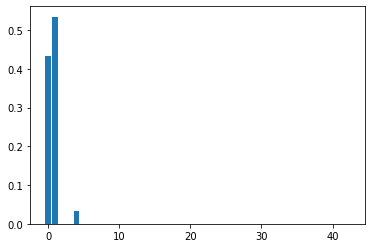

In [29]:
plt.bar(range(43),y_pred_prob[400])

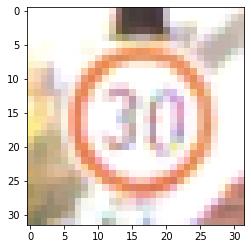

In [22]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('Data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained,X_test,y_test,scoring = accuracy_score):
  y_test_norm = np.argmax(y_test,axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob,axis=1)

  return scoring(y_test_norm,y_pred)

In [36]:
predict(model_trained,X_test,y_test)

0.8183673469387756

In [0]:
def get_cnn_v2(input_shape,num_classes): #get cnn version1
  return Sequential([
                      Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape = input_shape),
                      MaxPool2D(),
                      Dropout(0.3),
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
                      MaxPool2D(),
                      Dropout(0.3),
                      Flatten(),

                      Dense(1024,activation='relu'),
                      Dropout(0.3),
                      
                      Dense(num_classes,activation='softmax')
  ])
def train_and_predict(model):
  model_trained = train_model(model,X_train, y_train)
  return predict(model_trained,X_test,y_test)


In [41]:
train_and_predict(get_cnn_v2(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 4.5063 - accuracy: 0.3169 - val_loss: 0.9960 - val_accuracy: 0.7461
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.9466 - accuracy: 0.7235 - val_loss: 0.3310 - val_accuracy: 0.9239
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.5089 - accuracy: 0.8481 - val_loss: 0.1456 - val_accuracy: 0.9661
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3413 - accuracy: 0.8987 - val_loss: 0.0836 - val_accuracy: 0.9818
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2495 - accuracy: 0.9263 - val_loss: 0.0571 - val_accuracy: 0.9877


0.9301587301587302

In [42]:
def get_cnn_v3(input_shape,num_classes): #get cnn version1
  return Sequential([
                      Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape = input_shape),
                      Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'),
                      MaxPool2D(),
                      Dropout(0.3),
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
                      MaxPool2D(),
                      Dropout(0.3),
                     
                      Flatten(),

                      Dense(1024,activation='relu'),
                      Dropout(0.3),
                      
                      Dense(num_classes,activation='softmax')
  ])


train_and_predict(get_cnn_v3(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.3252 - accuracy: 0.5334 - val_loss: 0.3374 - val_accuracy: 0.9318
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4929 - accuracy: 0.8582 - val_loss: 0.1540 - val_accuracy: 0.9640
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2736 - accuracy: 0.9190 - val_loss: 0.0725 - val_accuracy: 0.9848
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2156 - accuracy: 0.9342 - val_loss: 0.0402 - val_accuracy: 0.9909
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1595 - accuracy: 0.9518 - val_loss: 0.0345 - val_accuracy: 0.9906


0.9571428571428572

In [48]:
def get_cnn_v4(input_shape,num_classes): #get cnn version1
  return Sequential([
                      Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape = input_shape),
                      Conv2D(filters=32,kernel_size=(3,3),activation = 'relu', padding = 'same'),
                      MaxPool2D(),
                      Dropout(0.3),
                     
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',padding='same'),
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
                      MaxPool2D(),
                      Dropout(0.3),
                     
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',padding = 'same'),
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
                      MaxPool2D(),
                      Dropout(0.3),
                     
                      Flatten(),

                      Dense(1024,activation='relu'),
                      Dropout(0.3),
                      
                      Dense(num_classes,activation='softmax')
  ])

train_and_predict(get_cnn_v4(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 13ms/step - loss: 2.5046 - accuracy: 0.3118 - val_loss: 1.0081 - val_accuracy: 0.7164
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.8119 - accuracy: 0.7494 - val_loss: 0.1829 - val_accuracy: 0.9578
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.3510 - accuracy: 0.8922 - val_loss: 0.0760 - val_accuracy: 0.9803
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2103 - accuracy: 0.9377 - val_loss: 0.0471 - val_accuracy: 0.9866
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1610 - accuracy: 0.9516 - val_loss: 0.0205 - val_accuracy: 0.9951


0.972108843537415

In [49]:
def get_cnn_v5(input_shape,num_classes): #get cnn version1
  return Sequential([
                      Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape = input_shape),
                      Conv2D(filters=32,kernel_size=(3,3),activation = 'relu', padding = 'same'),
                      MaxPool2D(),
                      Dropout(0.3),
                     
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',padding='same'),
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
                      MaxPool2D(),
                      Dropout(0.3),
                     
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',padding = 'same'),
                      Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
                      MaxPool2D(),
                      Dropout(0.3),
                     
                      Flatten(),

                      Dense(1024,activation='relu'),
                      Dropout(0.3),
                     
                      Dense(1024,activation='relu'),
                      Dropout(0.3),
                      
                      Dense(num_classes,activation='softmax')
  ])

train_and_predict(get_cnn_v5(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.5200 - accuracy: 0.2940 - val_loss: 1.2512 - val_accuracy: 0.5808
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.9336 - accuracy: 0.6946 - val_loss: 0.2836 - val_accuracy: 0.8978
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3943 - accuracy: 0.8750 - val_loss: 0.0990 - val_accuracy: 0.9724
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2390 - accuracy: 0.9287 - val_loss: 0.0497 - val_accuracy: 0.9855
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1784 - accuracy: 0.9474 - val_loss: 0.0312 - val_accuracy: 0.9901


0.9680272108843537

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [61]:
X_train_gray.reshape(-1,32,32,1).shape

(34799, 32, 32, 1)

In [65]:
model = get_cnn_v5((32,32,1),num_classes)
model_trained = train_model(model,X_train_gray,y_train)
predict(model_trained,X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6829 - accuracy: 0.2488 - val_loss: 0.8265 - val_accuracy: 0.7577
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.6190 - accuracy: 0.7974 - val_loss: 0.1532 - val_accuracy: 0.9596
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2601 - accuracy: 0.9170 - val_loss: 0.0659 - val_accuracy: 0.9808
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1637 - accuracy: 0.9502 - val_loss: 0.0353 - val_accuracy: 0.9900
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1206 - accuracy: 0.9622 - val_loss: 0.0359 - val_accuracy: 0.9904


0.9718820861678005

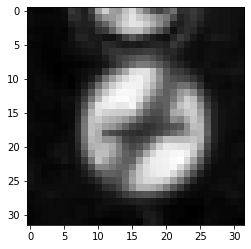

In [54]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))